In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [ ]:
data=pd.read_csv('/content/NIFTY_50.csv')

In [ ]:
data=data[['Date','Close']]
data[-45:]

,Date,Close
6037,2024-04-11,22753.80
6038,2024-04-12,22519.40
6039,2024-04-15,22272.50
6040,2024-04-16,22147.90
6041,2024-04-18,21995.85
6042,2024-04-19,22147.00
6043,2024-04-22,22336.40
6044,2024-04-23,22368.00
6045,2024-04-24,22402.40
6046,2024-04-25,22570.35


from matplotlib import pyplot as plt
_df_0['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
month_dict = {
  "Jan": "01",
  "Feb": "02",
  "Mar": "03",
  "Apr": "04",
  "May": "05",
  "Jun": "06",
  "Jul": "07",
  "Aug": "08",
  "Sep": "09",
  "Oct": "10",
  "Nov": "11",
  "Dec": "12"
}


In [ ]:
import re
format_data=[]
for Date in data['Date']:
  pattern = r"(\d{2})-(\d{2})-(\d{4})"
  match = re.match(pattern, Date)
  if match:
    day = int(match.group(1))
    month = int(match.group(2))
    year = int(match.group(3))
    format_data.append(f"{month}-{day}-{year}")
  else:
    pattern = r"(\d{2})-([A-Z][a-z]{2})-(\d{2})"
    match = re.match(pattern, Date)

    if match:
      year = int(match.group(3))
      month = str(match.group(2))
      day = int(match.group(1)[-2:])
      month=month_dict[month]
      format_data.append(f"{month}-{day}-20{year}")

len(format_data)

6082

In [ ]:
print(data['Close'])

Date
2000-01-03     1592.20
2000-01-04     1638.70
2000-01-05     1595.80
2000-01-06     1617.60
2000-01-07     1613.30
                ...   
2024-06-10    23259.20
2024-06-11    23264.85
2024-06-12    23322.95
2024-06-13    23398.90
2024-06-14    23465.60
Name: Close, Length: 6082, dtype: float64


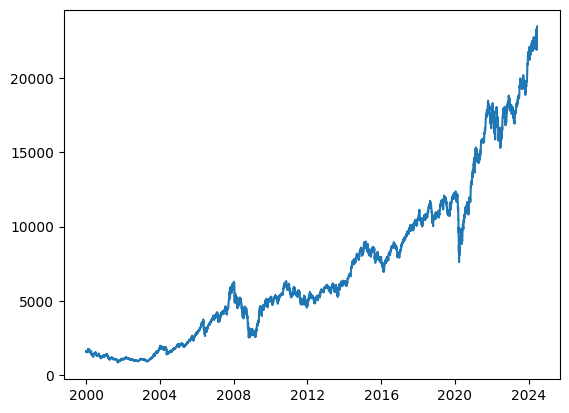

In [ ]:
data['Date']=pd.to_datetime(format_data)

plt.plot(data['Date'],data['Close'])

In [ ]:
from copy import deepcopy as dc

def prep_df_for_lstm(df, seq_len):
  df=dc(df)
  df.set_index('Date',inplace=True)
  for i in range(1,seq_len+1):
    df[f'Close(t-{i})']=df['Close'].shift(i)
  df.dropna(inplace=True)
  return df

lookback=7
shifted_df=prep_df_for_lstm(data,lookback)
shifted_df


,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
2000-01-12,1624.80,1572.50,1632.90,1613.30,1617.60,1595.80,1638.70,1592.20
2000-01-13,1621.40,1624.80,1572.50,1632.90,1613.30,1617.60,1595.80,1638.70
2000-01-14,1622.70,1621.40,1624.80,1572.50,1632.90,1613.30,1617.60,1595.80
2000-01-17,1611.60,1622.70,1621.40,1624.80,1572.50,1632.90,1613.30,1617.60
2000-01-18,1606.70,1611.60,1622.70,1621.40,1624.80,1572.50,1632.90,1613.30
...,...,...,...,...,...,...,...,...
2024-06-10,23259.20,23290.15,22821.40,22620.35,21884.50,23263.90,22530.70,22488.65
2024-06-11,23264.85,23259.20,23290.15,22821.40,22620.35,21884.50,23263.90,22530.70
2024-06-12,23322.95,23264.85,23259.20,23290.15,22821.40,22620.35,21884.50,23263.90


In [ ]:
shifted_df_as_np=shifted_df.to_numpy()
shifted_df_as_np.shape

(6075, 8)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(-1,1))
scaled_data=scaler.fit_transform(shifted_df_as_np)
scaled_data

array([[-0.93183969, -0.93627771, -0.93068595, ..., -0.93389181,
        -0.92998568, -0.93413566],
       [-0.93214042, -0.93163803, -0.93606231, ..., -0.9319485 ,
        -0.93381438, -0.92998568],
       [-0.93202544, -0.93193966, -0.93140695, ..., -0.93233182,
        -0.93186879, -0.93381438],
       ...,
       [ 0.98738247,  0.98810807,  0.99432545, ...,  0.94029225,
         0.8768926 ,  1.        ],
       [ 0.99410032,  0.99326227,  0.99482837, ...,  0.95821438,
         0.94256505,  0.8768926 ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         0.96050817,  0.94256505]])

In [ ]:
X=scaled_data[:,1:]
y=scaled_data[:,0]

X.shape,y.shape

((6075, 7), (6075,))

In [ ]:
X=dc(np.flip(X,axis=1))
X

array([[-0.93413566, -0.92998568, -0.93389181, ..., -0.93233182,
        -0.93068595, -0.93627771],
       [-0.92998568, -0.93381438, -0.9319485 , ..., -0.93058462,
        -0.93606231, -0.93163803],
       [-0.93381438, -0.93186879, -0.93233182, ..., -0.93596884,
        -0.93140695, -0.93193966],
       ...,
       [ 1.        ,  0.8768926 ,  0.94029225, ...,  1.        ,
         0.99432545,  0.98810807],
       [ 0.8768926 ,  0.94256505,  0.95821438, ...,  0.99724104,
         0.99482837,  0.99326227],
       [ 0.94256505,  0.96050817,  1.        , ...,  0.99774469,
         1.        ,  1.        ]])

In [ ]:
split_index=int(len(X)*0.95)
split_index=6048

In [ ]:
X_train=X[:split_index]
X_test=X[split_index:]
y_train=y[:split_index]
y_test=y[split_index:]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6048, 7), (27, 7), (6048,), (27,))

In [ ]:
X_train=X_train.reshape(-1,7,1)
X_test=X_test.reshape(-1,7,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6048, 7, 1), (27, 7, 1), (6048, 1), (27, 1))

In [ ]:
X_train=torch.tensor(X_train).float().to(device)
X_test=torch.tensor(X_test).float().to(device)
y_train=torch.tensor(y_train).float().to(device)
y_test=torch.tensor(y_test).float().to(device)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

(torch.Size([6048, 7, 1]),
 torch.Size([27, 7, 1]),
 torch.Size([6048, 1]),
 torch.Size([27, 1]))

In [ ]:
from torch.utils.data import Dataset
class TimeseriesDataset(Dataset):
  def __init__(self,X,y):
    self.X=X
    self.y=y
  def __len__(self):
    return len(self.X)
  def __getitem__(self,idx):
    return self.X[idx],self.y[idx]

train_ds=TimeseriesDataset(X_train,y_train)
test_ds=TimeseriesDataset(X_test,y_test)

In [ ]:
len(train_ds)

6048

In [ ]:
from torch.utils.data import DataLoader
batch_size=16
train_dl=DataLoader(train_ds,batch_size=batch_size,shuffle=True)
test_dl=DataLoader(test_ds,batch_size=batch_size,shuffle=False)

train_dl

In [ ]:
for _,batch in enumerate(train_dl):
  X_batch,y_batch=batch[0].to(device),batch[1].to(device)
  print(X_batch.shape,y_batch.shape)
  break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [ ]:
class LSTM(nn.Module):
  def __init__(self,input_size,hidden_size,num_layers):
    super().__init__()
    self.hiden_size=hidden_size
    self.num_layers=num_layers
    self.lstm=nn.LSTM(input_size,hidden_size,num_layers,batch_first=True)
    self.fc=nn.Linear(hidden_size,1)
  def forward(self,x):
    batch_size=x.shape[0]
    h0=torch.zeros(self.num_layers,batch_size,self.hiden_size).to(device)
    c0=torch.zeros(self.num_layers,batch_size,self.hiden_size).to(device)
    out,(hn,cn)=self.lstm(x,(h0,c0))
    out=self.fc(out[:,-1,:])
    return out
model=LSTM(1,4,1).to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
def train_one_epoch():
  model.train(True)
  print(f'Epoch:{epoch+1}')
  running_loss=0.0

  for batch_index,batch in enumerate(train_dl):
    X_batch,y_batch=batch[0].to(device),batch[1].to(device)
    output=model(X_batch)
    loss=loss_function(output,y_batch)
    running_loss+=loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch_index%100==99:
      avg_loss_across_batches=running_loss/100
      print(f'Batch:{batch_index+1} Loss:{avg_loss_across_batches}')
      running_loss=0.0
  print()


In [ ]:
def validate_one_epoch():
  model.train(False)
  running_loss=0.0

  for batch_index,batch in enumerate(test_dl):
    X_batch,y_batch=batch[0].to(device),batch[1].to(device)
    output=model(X_batch)
    loss=loss_function(output,y_batch)
    running_loss+=loss.item()

  avg_loss=running_loss/len(test_dl)
  print(f'Test Loss:{avg_loss}')
  print('**********************')
  print()

In [ ]:
learning_rate=0.001
num_epochs=100
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

for epoch in range(num_epochs):
  train_one_epoch()
  validate_one_epoch()

Epoch:1
Batch:100 Loss:0.24074833273887633
Batch:200 Loss:0.19366826601326464
Batch:300 Loss:0.14427632600069046

Test Loss:0.5787670314311981
**********************

Epoch:2
Batch:100 Loss:0.016696836260380224
Batch:200 Loss:0.009994774120859801
Batch:300 Loss:0.006049658600240946

Test Loss:0.1400216706097126
**********************

Epoch:3
Batch:100 Loss:0.004194427253678441
Batch:200 Loss:0.0030024666560348125
Batch:300 Loss:0.002257940237177536

Test Loss:0.06918059848248959
**********************

Epoch:4
Batch:100 Loss:0.0016074980844859965
Batch:200 Loss:0.001327280018304009
Batch:300 Loss:0.0010878260270692408

Test Loss:0.033494201488792896
**********************

Epoch:5
Batch:100 Loss:0.0007388729663216509
Batch:200 Loss:0.0005559164483565837
Batch:300 Loss:0.00040359211932809556

Test Loss:0.01912118587642908
**********************

Epoch:6
Batch:100 Loss:0.0003180516405336675
Batch:200 Loss:0.00027940253567066976
Batch:300 Loss:0.00020370182772239787

Test Loss:0.01092141

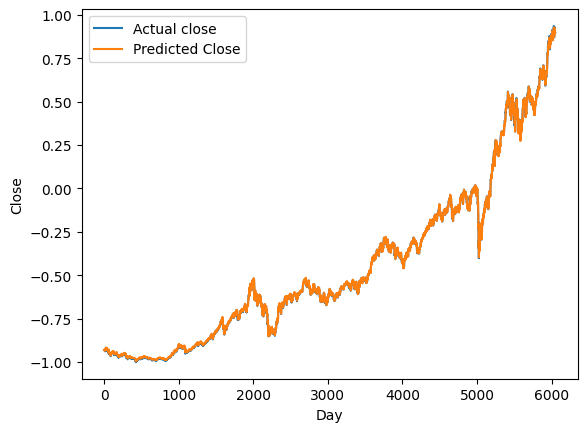

In [ ]:
with torch.no_grad():
  predicted=model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train.to('cpu').numpy(),label='Actual close')
plt.plot(predicted,label='Predicted Close')
plt.xlabel('Day')
plt.ylabel( 'Close')
plt.legend()
plt.show()

In [ ]:
def inverse_transform_train(value):
  train_predictions=value.flatten()

  dummies=np.zeros((X_train.shape[0],lookback+1))
  dummies[:,0]=train_predictions
  dummies=scaler.inverse_transform(dummies)

  train_predictions_it=dc(dummies[:,0])
  return train_predictions_it

In [ ]:
def inverse_transform_test(value):
  test_predictions=value.flatten()

  dummies=np.zeros((X_test.shape[0],lookback+1))
  dummies[:,0]=test_predictions
  dummies=scaler.inverse_transform(dummies)

  test_predictions=dc(dummies[:,0])
  return test_predictions

In [ ]:
train_predictions_it=inverse_transform_train(predicted)
y_train_it=inverse_transform_train(y_train.to('cpu'))

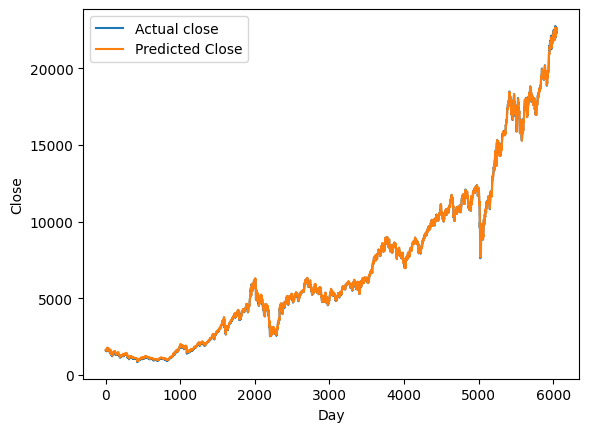

In [ ]:
plt.plot(y_train_it,label='Actual close')
plt.plot(train_predictions_it,label='Predicted Close')
plt.xlabel('Day')
plt.ylabel( 'Close')
plt.legend()
plt.show()

In [ ]:
with torch.no_grad():
  test_predicted=model(X_test.to(device)).to('cpu').numpy()
test_predicted_it=inverse_transform_test(test_predicted)
y_test_it=inverse_transform_test(y_test.to('cpu').numpy())

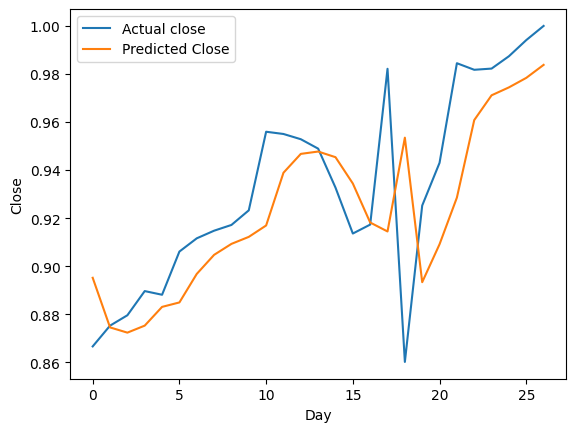

In [ ]:
plt.plot(y_test.to('cpu'),label='Actual close')
plt.plot(test_predicted,label='Predicted Close')
plt.xlabel('Day')
plt.ylabel( 'Close')
plt.legend()
plt.show()

In [ ]:
import torch

# Define and train your model (not shown here)

# Save the model state dictionary
model_state_dict = model.state_dict()
torch.save(model_state_dict, '/content/drive/MyDrive/Timeseries_weights/lstm2.pt')